In [1]:
import numpy as np 
import pandas as pd

### Loading the Data and Selecting the Features 

#### Import Data 

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)



In [3]:
loan_data_inputs_train.shape

(373028, 324)

In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 324)

In [6]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [7]:
loan_data_inputs_train['purpose:debt_consolidation'].unique()

array([ True, False])

In [8]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [9]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


### PD Model Estimation

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
reg = LogisticRegression()
pd.options.display.max_rows = None

In [13]:
reg.fit(inputs_train, loan_data_targets_train)

D:\Data\Anaconda\Installation\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
reg.intercept_

array([-0.49281596])

In [15]:
inputs_train.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d:<38',
       'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
       'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
 

In [16]:
reg.coef_

array([[ 9.86671445e-01,  7.78993196e-01,  5.95367567e-01,
         4.17172887e-01,  2.62354993e-01,  8.54532740e-02,
         9.08058109e-02,  1.06339967e-01,  4.67603090e-02,
         6.68001830e-02,  6.47162950e-02,  6.82877211e-02,
         8.52302132e-02,  1.44778430e-01,  1.15849428e-01,
         1.94323485e-01,  2.50669118e-01,  2.33094012e-01,
         2.73607498e-01,  3.25308167e-01,  5.05716672e-01,
         8.30045735e-02, -1.34691120e-02,  2.78320511e-01,
         1.75065080e-01,  1.84189773e-01,  2.36909739e-01,
         5.26330945e-02,  7.11565962e-02,  1.08869825e-01,
         1.33206185e-01,  1.01504163e-01,  6.93482186e-02,
         1.31883975e-01,  1.11319928e+00,  9.22319080e-01,
         8.25742836e-01,  6.26932649e-01,  4.69187396e-01,
         2.23485202e-01, -3.32445551e-02,  9.83367436e-01,
         6.25605334e-01,  3.57537040e-01,  1.48136403e-01,
         7.75263042e-02,  5.59382150e-02,  8.20226476e-02,
         1.36495583e-01,  1.45157829e-01, -2.05322941e-0

In [17]:
feature_name = inputs_train.columns.values

In [18]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.492816
1,grade:A,0.986671
2,grade:B,0.778993
3,grade:C,0.595368
4,grade:D,0.417173
5,grade:E,0.262355
6,grade:F,0.085453
7,home_ownership:OWN,0.090806
8,home_ownership:MORTGAGE,0.106340
9,addr_state:NM_VA,0.046760


### Build a Logistic Regression model with P-Values

In [19]:
import numpy as np
import scipy.stats as stat
from sklearn import linear_model

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        # Initialize with sklearn's LogisticRegression parameters
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # Fit the logistic regression model
        self.model.fit(X, y)
        
        # Compute the p-values for the model coefficients
        denom = 2.0 * (1.0 + np.cosh(self.model.decision_function(X)))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)  # Fisher Information Matrix
        
        try:
            Cramer_Rao = np.linalg.inv(F_ij)  # Inverse Information Matrix
        except np.linalg.LinAlgError:
            print("Fisher Information Matrix is singular; cannot compute p-values.")
            return
        
        # Standard error of coefficients
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        
        # z-scores for each coefficient
        z_scores = self.model.coef_[0] / sigma_estimates
        
        # Compute two-tailed p-values
        self.p_values = [stat.norm.sf(abs(z)) * 2 for z in z_scores]
        
        # Store coefficients and intercept for reference
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_

In [20]:
reg = LogisticRegression_with_p_values()

In [21]:
print(inputs_train.dtypes)


grade:A                                 bool
grade:B                                 bool
grade:C                                 bool
grade:D                                 bool
grade:E                                 bool
grade:F                                 bool
home_ownership:OWN                      bool
home_ownership:MORTGAGE                 bool
addr_state:NM_VA                       int64
addr_state:NY                           bool
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                           bool
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                           bool
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified        bool
verificati

In [22]:
inputs_train = inputs_train.astype({col: 'int64' for col in inputs_train.select_dtypes('bool').columns})


In [23]:
print(inputs_train.dtypes)


grade:A                                int64
grade:B                                int64
grade:C                                int64
grade:D                                int64
grade:E                                int64
grade:F                                int64
home_ownership:OWN                     int64
home_ownership:MORTGAGE                int64
addr_state:NM_VA                       int64
addr_state:NY                          int64
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                          int64
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                          int64
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified       int64
verificati

In [24]:
reg.fit(inputs_train, loan_data_targets_train)


D:\Data\Anaconda\Installation\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.492816
1,grade:A,0.986671
2,grade:B,0.778993
3,grade:C,0.595368
4,grade:D,0.417173
5,grade:E,0.262355
6,grade:F,0.085453
7,home_ownership:OWN,0.090806
8,home_ownership:MORTGAGE,0.106340
9,addr_state:NM_VA,0.046760


In [26]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [27]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [28]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [29]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [32]:
inputs_train = inputs_train.astype({col:'int64' for col in  inputs_train.select_dtypes('bool').columns})

In [33]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

D:\Data\Anaconda\Installation\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
feature_name = inputs_train.columns.values

In [35]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

In [36]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
# Here we get the results for our final PD model.

In [37]:
import pickle

In [38]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

PD Model Validation (Test)

In [39]:
### Out-of-sample validation (test)

In [40]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [41]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [42]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [43]:
inputs_test = inputs_test.astype({col: 'int64' for col in inputs_test.select_dtypes('bool').columns})
print(inputs_test.dtypes)

grade:A                                int64
grade:B                                int64
grade:C                                int64
grade:D                                int64
grade:E                                int64
grade:F                                int64
home_ownership:OWN                     int64
home_ownership:MORTGAGE                int64
addr_state:NM_VA                       int64
addr_state:NY                          int64
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                          int64
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                          int64
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified       int64
verificati

In [44]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [45]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [47]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.07616522, 0.92383478],
       [0.14901396, 0.85098604],
       [0.11545942, 0.88454058],
       ...,
       [0.02674557, 0.97325443],
       [0.03958881, 0.96041119],
       [0.04727192, 0.95272808]])

In [48]:
y_hat_test_proba = y_hat_test_proba[:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

In [49]:
loan_data_targets_test_temp = loan_data_targets_test

In [50]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [51]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [52]:
df_actual_predicted_probs.shape

(93257, 2)

In [53]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [54]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.923835
1,1,0.850986
2,1,0.884541
3,1,0.940338
4,1,0.968559


*Với các xác suất > cutoff --> good 
*Với các xác suất < cutoff --> bad

Accuracy and Area Under the Curve

In [55]:
tr = 0.9 
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [56]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35895,47172


Có nhiều hơn giá trị False Positive Predictions nhưng có ít hơn True Positive (tức các khoản vay tốt - good loans) 

--> Giảm được tỉ lệ default nhưng giảm cả hồ sơ vay --> losing business

--> Overall accuracy không phải là thước đo cho PD model 

In [57]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384904,0.505828


*Sử dụng Confusion Matrix để kiểm tra sự chính xác của Model 

In [58]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]) + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

Predicted,0,1
Actual,,
0,0.663993,0.615096
1,0.969815,1.090738


ROC là gì. Tại sao lại quan trọng

- ROC Curve là đồ thị thể hiện mối quan hệ giữa tỉ lệ True Positive và False Positve ở các threshold phân loại khác nhau 
- Đường ROC cho thấy cách mà mô hình hoạt động với các ngưỡng khác nhau. Một mô hình có điểm càng đến (0,1) càng tốt, tức là có tỷ lệ dương thực cao mà tỉ lệ dương giả thấp (True Positive Rate > False Positive Rate)
- x-axis (False Positive), y-axis (True Positive)



In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

In [60]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99987962e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99239774, 0.99049137, ..., 0.49956263, 0.49564312,
        0.48834338]))

In [61]:
fpr, tpr, threshold = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

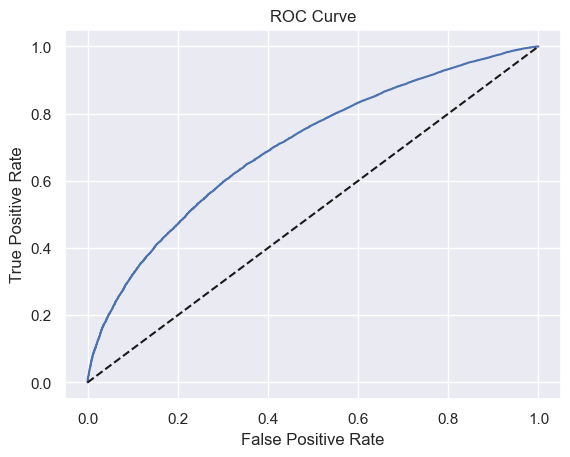

In [63]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [64]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.701713095662176

Cách để biết model perform tốt hay không nhờ diện tích của Area Under The curve
AUC được tính dựa trên đồ thị ROC (Receiver Operation Characteristic Curve)

TPR = (True Positive / True Positive + False Positive)
FPR = (False Positive / False Positive + True Negative)

### Kiểm định và visualize bằng Gini và Kolmogorov-Smirnov

In [65]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [67]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1 
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [68]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,64110,0,0.488343,0,1,0,1
1,50505,1,0.495643,0,2,1,1
2,2051,0,0.499563,0,3,1,2
3,12600,1,0.514829,0,4,2,2
4,81256,1,0.519018,0,5,3,2


In [80]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population']/ (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / (df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [83]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cum Perc Population,Cum Perc Good,Cum Perc Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,64110,0,0.488343,0,1,0,1,0.000011,0.000000,0.000098,0.000011,0.000000,0.000098
1,50505,1,0.495643,0,2,1,1,0.000021,0.000012,0.000098,0.000021,0.000012,0.000098
2,2051,0,0.499563,0,3,1,2,0.000032,0.000012,0.000196,0.000032,0.000012,0.000196
3,12600,1,0.514829,0,4,2,2,0.000043,0.000024,0.000196,0.000043,0.000024,0.000196
4,81256,1,0.519018,0,5,3,2,0.000054,0.000036,0.000196,0.000054,0.000036,0.000196


Text(0.5, 1.0, 'Gini')

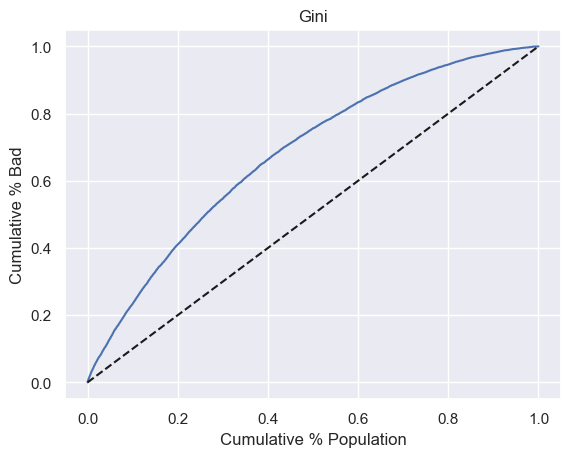

In [85]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'],linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [86]:
Gini = AUROC * 2 - 1
Gini

0.403426191324352

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

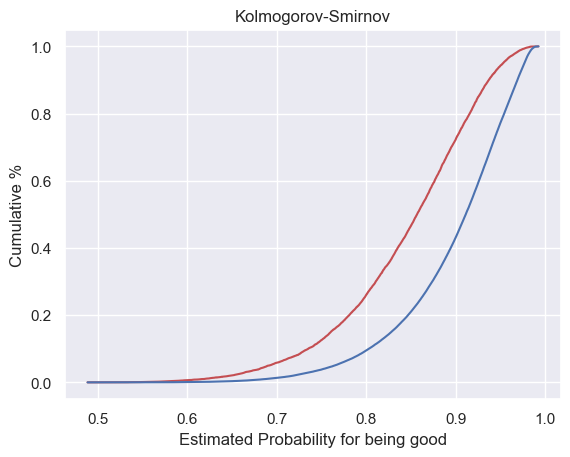

In [87]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [90]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29702055187417253

## Applying the PD Model 

### Calculating PD of individual accounts

In [96]:
pd.options.display.max_columns = None

In [97]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [98]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.319817,NaN
1,grade:A,0.925119,6.827321e-24
2,grade:B,0.688756,1.652363e-28
3,grade:C,0.494540,1.048258e-17
4,grade:D,0.312337,1.180103e-08
5,grade:E,0.160802,9.707417e-04
6,grade:F,-0.029780,5.554910e-01
7,home_ownership:OWN,0.079483,7.680396e-05
8,home_ownership:MORTGAGE,0.104010,1.913873e-16
9,addr_state:NM_VA,0.049230,1.236309e-01


### Creating a Score Card from PD Model

In [106]:
df_ref_categories = pd.DataFrame(ref_categories, columns =['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


#### Mục đích của việc thêm p-values và coefficient của các cột reference là để có output hoàn chỉnh của PD model 

In [105]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard 

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.319817,NaN
1,1,grade:A,0.925119,6.827321e-24
2,2,grade:B,0.688756,1.652363e-28
3,3,grade:C,0.494540,1.048258e-17
4,4,grade:D,0.312337,1.180103e-08
5,5,grade:E,0.160802,9.707417e-04
6,6,grade:F,-0.029780,5.554910e-01
7,7,home_ownership:OWN,0.079483,7.680396e-05
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16
9,9,addr_state:NM_VA,0.049230,1.236309e-01


In [114]:
df_scorecard['Original Feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [115]:
df_scorecard

,index,Feature name,Coefficients,p_values,Orginal Feature name,Original Feature name
0,0,Intercept,-0.319817,NaN,Intercept,Intercept
1,1,grade:A,0.925119,6.827321e-24,grade,grade
2,2,grade:B,0.688756,1.652363e-28,grade,grade
3,3,grade:C,0.494540,1.048258e-17,grade,grade
4,4,grade:D,0.312337,1.180103e-08,grade,grade
5,5,grade:E,0.160802,9.707417e-04,grade,grade
6,6,grade:F,-0.029780,5.554910e-01,grade,grade
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,home_ownership
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,home_ownership
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,addr_state


Để tạo thành 1 scorecard, ta cần chuyển regeression coefficient từ PD model thành simple scorecard 

Cần xác định minimum và maximum score = 300, 500

In [116]:
min_score = 300
max_score = 850

Hệ số coefficient càng cao, chứng tỏ khoản vay có sự tin cậy cao nên để xác định được minimum credit assessment, ta cần có coef thấp nhất cho từng categories

Ngược lại như vậy với maximum credit assessment

In [122]:
min_sum_coef = df_scorecard.groupby('Original Feature name')['Coefficients'].min().sum()
min_sum_coef

-0.8720742865314363

In [123]:
max_sum_coef = df_scorecard.groupby('Original Feature name')['Coefficients'].max().sum()
max_sum_coef

5.522300498875123

Bây giờ rescale thành scores

In [125]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Orginal Feature name,Original Feature name,Score - Calculation
0,0,Intercept,-0.319817,NaN,Intercept,Intercept,-27.508460
1,1,grade:A,0.925119,6.827321e-24,grade,grade,79.572350
2,2,grade:B,0.688756,1.652363e-28,grade,grade,59.242007
3,3,grade:C,0.494540,1.048258e-17,grade,grade,42.536932
4,4,grade:D,0.312337,1.180103e-08,grade,grade,26.865037
5,5,grade:E,0.160802,9.707417e-04,grade,grade,13.831072
6,6,grade:F,-0.029780,5.554910e-01,grade,grade,-2.561457
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,home_ownership,6.836621
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,home_ownership,8.946190
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,addr_state,4.234454


Tính score cho intercept_

In [129]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\Manh Tran\AppData\Local\Temp\ipykernel_19316\1263832758.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) 

,index,Feature name,Coefficients,p_values,Orginal Feature name,Original Feature name,Score - Calculation
0,0,Intercept,-0.319817,NaN,Intercept,Intercept,347.501353
1,1,grade:A,0.925119,6.827321e-24,grade,grade,79.572350
2,2,grade:B,0.688756,1.652363e-28,grade,grade,59.242007
3,3,grade:C,0.494540,1.048258e-17,grade,grade,42.536932
4,4,grade:D,0.312337,1.180103e-08,grade,grade,26.865037
5,5,grade:E,0.160802,9.707417e-04,grade,grade,13.831072
6,6,grade:F,-0.029780,5.554910e-01,grade,grade,-2.561457
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,home_ownership,6.836621
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,home_ownership,8.946190
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,addr_state,4.234454


In [132]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Orginal Feature name,Original Feature name,Score - Calculation,Score Preliminary,Score - Preliminary
0,0,Intercept,-0.319817,NaN,Intercept,Intercept,347.501353,348.0,348.0
1,1,grade:A,0.925119,6.827321e-24,grade,grade,79.572350,80.0,80.0
2,2,grade:B,0.688756,1.652363e-28,grade,grade,59.242007,59.0,59.0
3,3,grade:C,0.494540,1.048258e-17,grade,grade,42.536932,43.0,43.0
4,4,grade:D,0.312337,1.180103e-08,grade,grade,26.865037,27.0,27.0
5,5,grade:E,0.160802,9.707417e-04,grade,grade,13.831072,14.0,14.0
6,6,grade:F,-0.029780,5.554910e-01,grade,grade,-2.561457,-3.0,-3.0
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,home_ownership,6.836621,7.0,7.0
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,home_ownership,8.946190,9.0,9.0
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,addr_state,4.234454,4.0,4.0


In [155]:
min_sum_score_prel = df_scorecard.groupby('Original Feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel


299.0

Kết quả các việc sum các giá trị min < 300 là result của việc round tất cả value trong Preliminary - Score

In [171]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][39] = 42
df_scorecard['Score - Final'][15] = 10




C:\Users\Manh Tran\AppData\Local\Temp\ipykernel_19316\444791989.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][39] = 42
C:\Users\Manh Tran\AppData\Local\Temp\ipykernel_19316\444791989.py:3: SettingWithCopyW

In [174]:
df_scorecard

,index,Feature name,Coefficients,p_values,Orginal Feature name,Original Feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.319817,NaN,Intercept,Intercept,347.501353,348.0,0.498647,348.0
1,1,grade:A,0.925119,6.827321e-24,grade,grade,79.572350,80.0,0.427650,80.0
2,2,grade:B,0.688756,1.652363e-28,grade,grade,59.242007,59.0,-0.242007,59.0
3,3,grade:C,0.494540,1.048258e-17,grade,grade,42.536932,43.0,0.463068,43.0
4,4,grade:D,0.312337,1.180103e-08,grade,grade,26.865037,27.0,0.134963,27.0
5,5,grade:E,0.160802,9.707417e-04,grade,grade,13.831072,14.0,0.168928,14.0
6,6,grade:F,-0.029780,5.554910e-01,grade,grade,-2.561457,-3.0,-0.438543,-3.0
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,home_ownership,6.836621,7.0,0.163379,7.0
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,home_ownership,8.946190,9.0,0.053810,9.0
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,addr_state,4.234454,4.0,-0.234454,4.0


In [205]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][15] = 10
df_scorecard



C:\Users\Manh Tran\AppData\Local\Temp\ipykernel_19316\166126155.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][15] = 10
C:\Users\Manh Tran\AppData\Local\Temp\ipykernel_19316\166126155.py:2: SettingWithCopyW

,index,Feature name,Coefficients,p_values,Original Feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.319817,NaN,Intercept,347.501353,348.0,0.498647,348.0
1,1,grade:A,0.925119,6.827321e-24,grade,79.572350,80.0,0.427650,80.0
2,2,grade:B,0.688756,1.652363e-28,grade,59.242007,59.0,-0.242007,59.0
3,3,grade:C,0.494540,1.048258e-17,grade,42.536932,43.0,0.463068,43.0
4,4,grade:D,0.312337,1.180103e-08,grade,26.865037,27.0,0.134963,27.0
5,5,grade:E,0.160802,9.707417e-04,grade,13.831072,14.0,0.168928,14.0
6,6,grade:F,-0.029780,5.554910e-01,grade,-2.561457,-3.0,-0.438543,-3.0
7,7,home_ownership:OWN,0.079483,7.680396e-05,home_ownership,6.836621,7.0,0.163379,7.0
8,8,home_ownership:MORTGAGE,0.104010,1.913873e-16,home_ownership,8.946190,9.0,0.053810,9.0
9,9,addr_state:NM_VA,0.049230,1.236309e-01,addr_state,4.234454,4.0,-0.234454,4.0


In [210]:
min_sum_score_prel = df_scorecard.groupby('Original Feature name')['Score - Final'].min().sum()
min_sum_score_prel = min_sum_score_prel + 1
min_sum_score_prel

300.0

In [211]:
max_sum_score_prel = df_scorecard.groupby('Original Feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

### Calculating Credit Score

In [213]:
inputs_test_ref_cat_w_intercept = inputs_test_with_ref_cat

In [214]:
inputs_test_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [215]:
inputs_test_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
